In [219]:
#import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import numpy as np
import math

In [220]:
from enum import Enum
class Coordinate(Enum):
    CIRCULAR = 1
    LINEAR = 0
    HYPERBOLIC = -1

In [221]:
def rot(x_init, y_init, z_init, c_mode, max_iterations):
    x_prev, y_prev, z_prev = x_init, y_init, z_init
    x_values, y_values, z_values = [], [], []
    for i in range(max_iterations):

        dir = 1 if (np.sign(z_prev)) > -1 else -1
        
        if c_mode == Coordinate.CIRCULAR:
            e = math.degrees(math.atan(1/(1 << i)))
        elif c_mode == Coordinate.LINEAR:
            e = 1/(1 << i)
        elif c_mode == Coordinate.HYPERBOLIC:
            if i == 0:
                i = 1
            e = math.atanh(1/(1 << i))
        # Unified CORDIC Algorithm from Andraka (1998)
        x = x_prev - c_mode.value * y_prev * dir * (1/(1 << i))
        y = y_prev + x_prev * dir * (1/(1 << i))
        z = z_prev - dir * e

        x_prev, y_prev, z_prev = x, y, z

        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
    return (x_values, y_values, z_values, an)

In [222]:
an = 1.647
x_init = 1/an
y_init = 0
z_init = 45
coordinate = Coordinate.CIRCULAR
max_iter = 20

results = rot(x_init, y_init, z_init, coordinate, max_iter)
print(results)

([0.607164541590771, 0.3035822707953855, 0.5312689738919247, 0.6356253794778385, 0.6836530434122647, 0.7064254195601852, 0.7174777926715418, 0.7120378396875872, 0.7092959675110191, 0.7079195990051349, 0.7072300618774989, 0.706884955751311, 0.7070575931227981, 0.706971295503868, 0.7070144495813226, 0.706992873859432, 0.7070036620496066, 0.7070090560623892, 0.7070063590765744, 0.7070050105785228], [0.607164541590771, 0.9107468123861566, 0.8348512446873102, 0.7684426229508197, 0.7287160367334548, 0.7073518791268215, 0.6963139819461936, 0.7019192772014401, 0.7047006750127197, 0.7060860186992647, 0.7067773464326681, 0.7071226736113192, 0.706950094276419, 0.707036405017767, 0.7069932549142817, 0.7070148312829823, 0.7070040434278514, 0.7069986494179786, 0.7070013464434916, 0.7070026949511039], [0.0, -26.56505117707799, -12.528807709151511, -5.403791360249714, -1.8274569852523626, -0.03754637700629315, 0.8576273332047812, 0.41001316234422813, 0.18620266197569005, 0.07429698490948315, 0.0183440

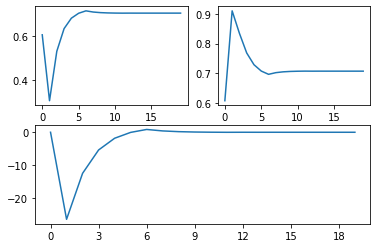

In [223]:
x_values = results[0]
y_values = results[1]
z_values = results[2]
iterations = [i for i in range(max_iter)]

gs = gridspec.GridSpec(2, 2)

fig = plt.figure()

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(iterations, x_values)

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(iterations, y_values)

ax3 = fig.add_subplot(gs[1,:])
ax3.plot(iterations, z_values)
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))


In [ ]:
def vect(x_init, y_init, z_init, c_mode, max_iterations):
    